<a href="https://colab.research.google.com/github/jfr11101/MyProjects/blob/main/Pertol_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url =  'https://raw.githubusercontent.com/hrishikeshkini/Petrol-Prices-Forecasting/main/train_data.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [5]:
df.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [6]:
df.dropna()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [8]:
df.rename(columns={'Petrol (USD)': 'Petrol'}, inplace=True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


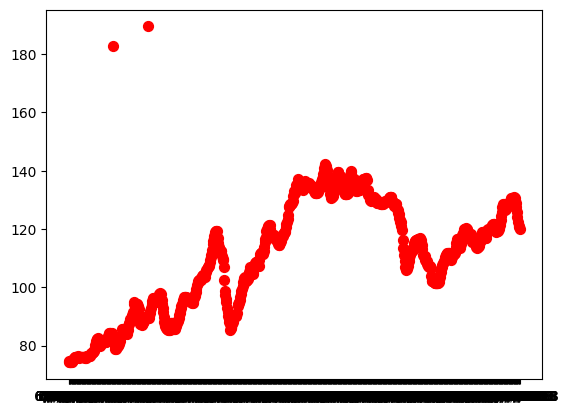

In [10]:
bplt.scatter(df.Date, df.Petrol, color='red', label='price', s=50)

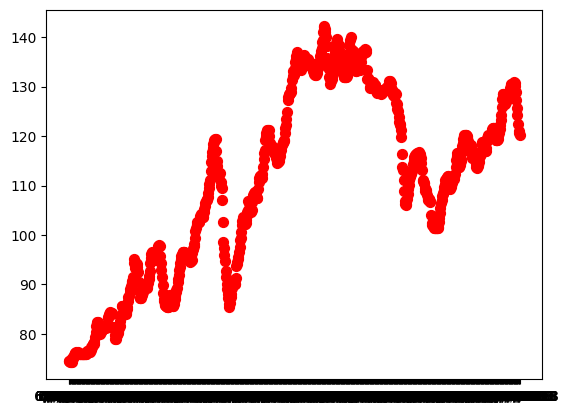

In [12]:
df2 = df[df['Petrol']<160]
plt.scatter(df2.Date, df2.Petrol, color='red', s=50)

In [13]:
df2 = df2.reset_index()['Petrol']
df2.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [16]:
df3

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [17]:
training_size = int(len(df3)*0.65)
test_size = len(df3)-training_size
train_data, test_data = df3[:training_size, :], df3[training_size:,:1]

In [18]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
X_train.shape

(424, 100)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
X_train.shape

(424, 100, 1)

In [23]:
X_test.shape

(183, 100, 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, retrun_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

In [ ]:
train_pred = model.predict(X_train)
test_pred  = model.predict(X_test)

In [ ]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [ ]:
url_test = https://raw.githubusercontent.com/hrishikeshkini/Petrol-Prices-Forecasting/main/test_data.csv